In [3]:
import pandas as pd
from data_loader import *
import seaborn as sns
from global_features_descriptors import get_features
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from VGG16 import VGG16CNN
from VGG19 import VGG19CNN
import cv2
SEED = 42

# Data
We devided it into 2 categories:
* 1 high stretching Rm resistance
* 0 low stretching Rm resistance

In [5]:
df = load_data(DATA_DIR)
df.head()

,filename,category,zoom
0,/content/drive/My Drive/data/lowRm/20_1_1_500x...,0,500
1,/content/drive/My Drive/data/lowRm/19_2_0_500x...,0,500
2,/content/drive/My Drive/data/lowRm/16_2_3_500x...,0,500
3,/content/drive/My Drive/data/lowRm/20_3_0_500x...,0,500
4,/content/drive/My Drive/data/lowRm/15_1_0_500x...,0,500


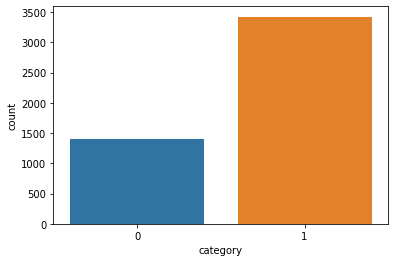

In [6]:
sns.countplot(x='category', data=df)

# Basic classificators

In [63]:
X, y = get_features(df)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED, test_size=0.2)

In [9]:
num_trees = 100
models = []
names = []
models.append(('LR', LogisticRegression(random_state=SEED)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=SEED)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, random_state=SEED)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(random_state=SEED)))

In [10]:
scoring='accuracy'
accuracy = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=SEED)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    accuracy.append(cv_results)
    names.append(name)
    print(f'{name}: mean cv: {cv_results.mean()} std: {cv_results.std()}')

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: mean cv: 0.738069443509858 std: 0.02346392008955086


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LDA: mean cv: 0.7951281878743018 std: 0.017599172380985094


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: mean cv: 0.7302866563488326 std: 0.019433256358221074


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


CART: mean cv: 0.7979732184913532 std: 0.02101197081972899


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: mean cv: 0.8651362627010295 std: 0.016190676272201752
NB: mean cv: 0.6869732857815759 std: 0.025761575119875254


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: mean cv: 0.7160251665433013 std: 0.015401105422804012


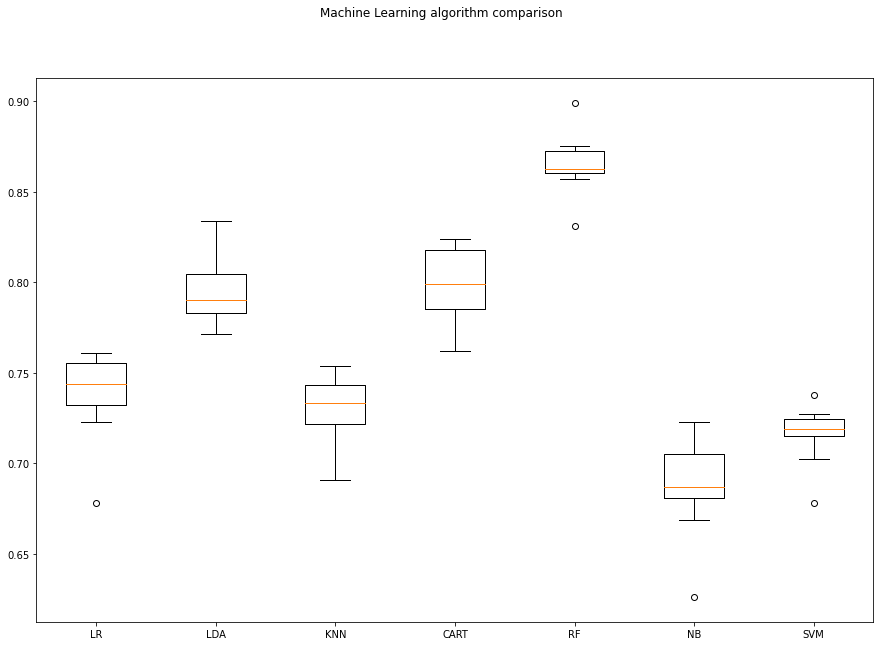

In [11]:
fig = plt.figure(figsize=(15,10))
fig.suptitle('Machine Learning algorithm comparison')
ax = fig.add_subplot()
plt.boxplot(accuracy)
ax.set_xticklabels(names)
plt.show()

## Testing the best - RandomForest

In [12]:
clf = RandomForestClassifier(n_estimators=num_trees, random_state=SEED)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [13]:
rf_predictions = clf.predict(X_test)

In [14]:
print(f'''
Random Forest metrics:
      Accuracy: \t{accuracy_score(y_test, rf_predictions)}
      Precision: \t{precision_score(y_test, rf_predictions)}
      Recall: \t\t{recall_score(y_test, rf_predictions)}
      ''')


Random Forest metrics:
      Accuracy: 	0.8362694300518134
      Precision: 	0.8371161548731643
      Recall: 		0.9457013574660633
      


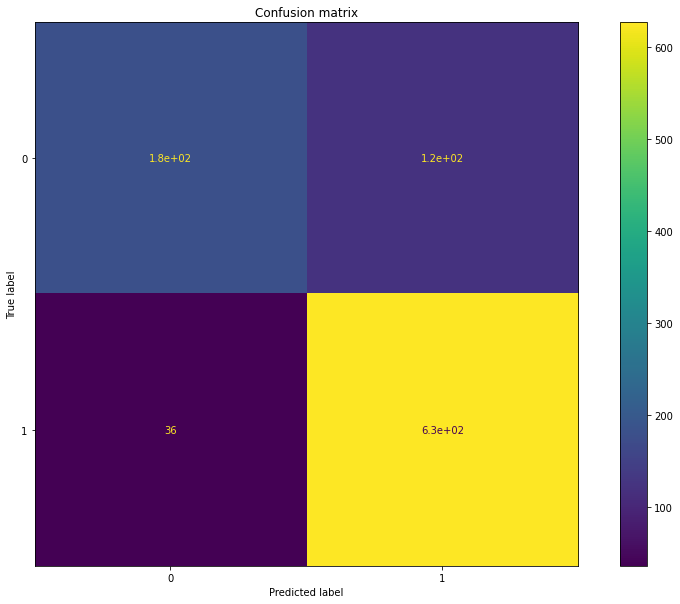

In [15]:
cm_fig = plt.figure(figsize=(15,10))
ax_cm_fig = cm_fig.add_subplot()
plot_confusion_matrix(clf, X_test, y_test, ax=ax_cm_fig)
ax_cm_fig.set_title('Confusion matrix')
plt.show()

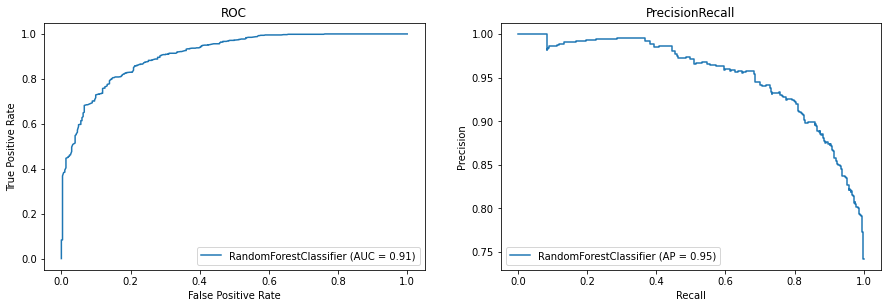

In [16]:
roc_pr_fig = plt.figure(figsize=(15,10))
ax_roc_fig = roc_pr_fig.add_subplot(221)
ax_roc_fig.set_title('ROC')
plot_roc_curve(clf, X_test, y_test, ax=ax_roc_fig)

ax_pr_fig = roc_pr_fig.add_subplot(222)
ax_pr_fig.set_title('PrecisionRecall')
plot_precision_recall_curve(clf, X_test, y_test, ax=ax_pr_fig)

plt.show()

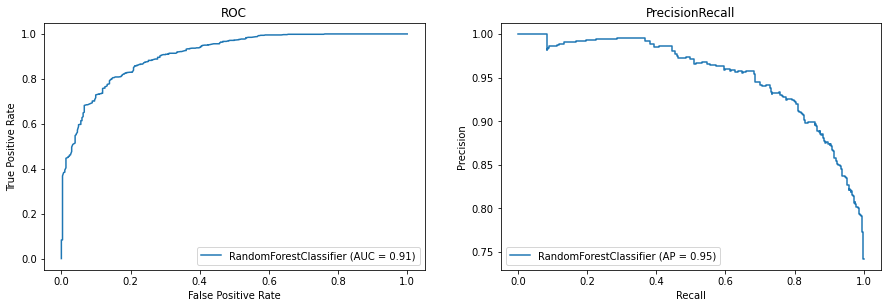

In [17]:
roc_pr_fig = plt.figure(figsize=(15,10))
ax_roc_fig = roc_pr_fig.add_subplot(221)
ax_roc_fig.set_title('ROC')
plot_roc_curve(clf, X_test, y_test, ax=ax_roc_fig)

ax_pr_fig = roc_pr_fig.add_subplot(222)
ax_pr_fig.set_title('PrecisionRecall')
plot_precision_recall_curve(clf, X_test, y_test, ax=ax_pr_fig)

plt.show()

## Testing the best - RandomForest

In [18]:
clf = RandomForestClassifier(n_estimators=num_trees, random_state=SEED)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [19]:
rf_predictions = clf.predict(X_test)

In [20]:
print(f'''
Random Forest metrics:
      Accuracy: \t{accuracy_score(y_test, rf_predictions)}
      Precision: \t{precision_score(y_test, rf_predictions)}
      Recall: \t\t{recall_score(y_test, rf_predictions)}
      ''')


Random Forest metrics:
      Accuracy: 	0.8362694300518134
      Precision: 	0.8371161548731643
      Recall: 		0.9457013574660633
      


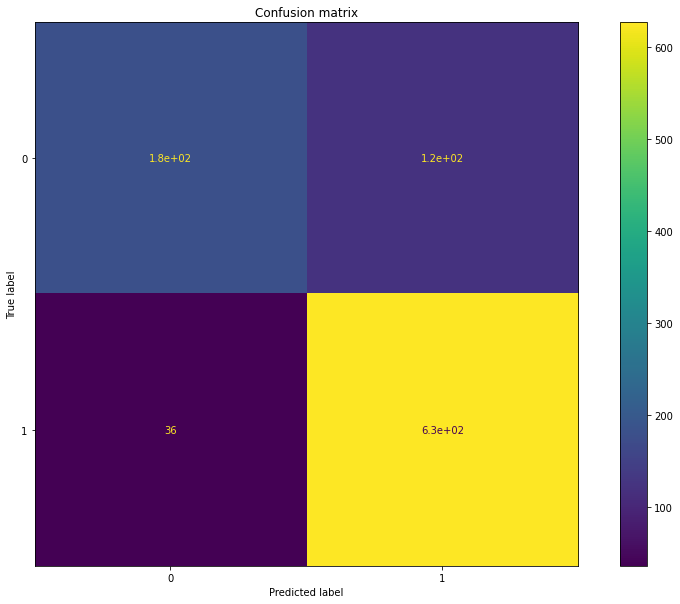

In [21]:
cm_fig = plt.figure(figsize=(15,10))
ax_cm_fig = cm_fig.add_subplot()
plot_confusion_matrix(clf, X_test, y_test, ax=ax_cm_fig)
ax_cm_fig.set_title('Confusion matrix')
plt.show()

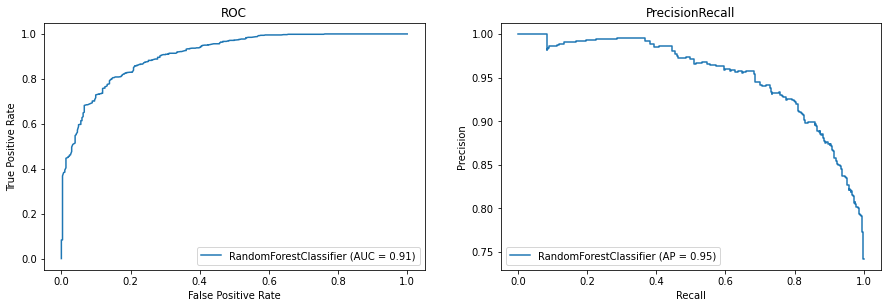

In [22]:
roc_pr_fig = plt.figure(figsize=(15,10))
ax_roc_fig = roc_pr_fig.add_subplot(221)
ax_roc_fig.set_title('ROC')
plot_roc_curve(clf, X_test, y_test, ax=ax_roc_fig)

ax_pr_fig = roc_pr_fig.add_subplot(222)
ax_pr_fig.set_title('PrecisionRecall')
plot_precision_recall_curve(clf, X_test, y_test, ax=ax_pr_fig)

plt.show()

### Images with wrong predictions

In [23]:
def get_index_of_list_elem(items, value):
    for i in range(len(items)):
        found = True
        for a,b in zip(items[i], value):
            if a != b:
                found = False
        if found:
            return i
    return -1

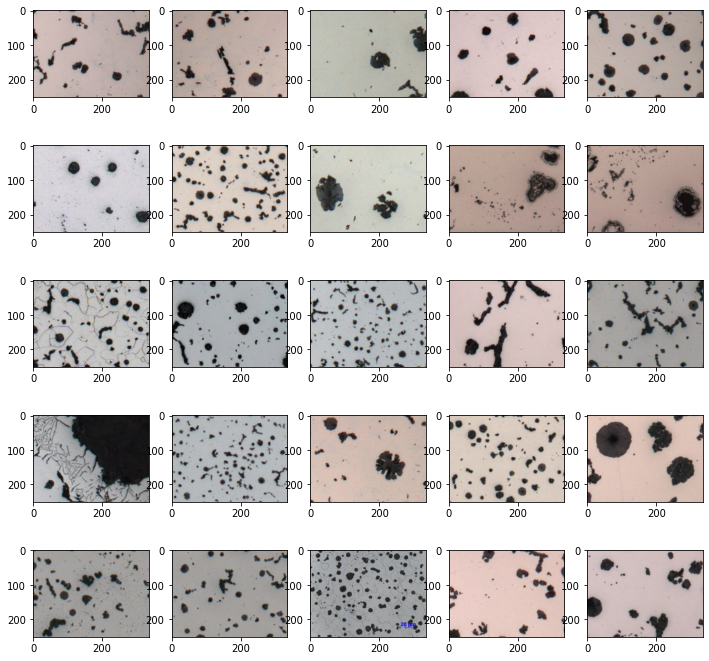

In [65]:
fig=plt.figure(figsize=(12, 12))
columns = 5
rows = 5

df_list = list(df['filename'])
j = 1

for i in range(len(X_test)):
    if rf_predictions[i] != y_test[i]:
        index = get_index_of_list_elem(X, X_test[i])
        if index != -1:
            image = cv2.imread(df['filename'][index])
            fig.add_subplot(rows, columns, j)
            plt.imshow(image)
            j += 1
    if j-1 == columns*rows:
        break
plt.show()

# Neural networks

In [25]:
X = []
y = []
for _, data in df.iterrows():
    img = cv2.imread(data.filename)
    X.append(img)
    y.append(data.category)
X = np.array(X)
y = np.array(y)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED, test_size=0.2)

## VGG16

In [59]:
def images_wrong_pred(predictions):
    fig=plt.figure(figsize=(12, 12))
    columns = 5
    rows = 5

    round_preds = []
    for pred in predictions:
        pred = list(pred)[0]
        round_preds.append(round(pred))

    j = 1

    for i in range(len(X_test)):
        if round_preds[i] != y_test[i]:
            fig.add_subplot(rows, columns, j)
            plt.imshow(X_test[i])
            j += 1
        if j-1 == columns*rows:
            break
    plt.show()

In [28]:
vgg16 = VGG16CNN(image_size=X_train[0].shape, batch_size = 10, nb_epochs = 10)

In [29]:
vgg16.model_summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 253, 337, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 251, 335, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 253, 337, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 251, 335, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 125, 167, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 127, 169, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 167, 128)     7

In [30]:
history = vgg16.train_model(X_train, y_train)

Epoch 1/10
386/386 [==============================] - 145s 363ms/step - loss: 104.2510 - accuracy: 0.6864
Epoch 2/10
386/386 [==============================] - 143s 371ms/step - loss: 0.6080 - accuracy: 0.7050
Epoch 3/10
386/386 [==============================] - 144s 372ms/step - loss: 0.6060 - accuracy: 0.7111
Epoch 4/10
386/386 [==============================] - 144s 373ms/step - loss: 0.6081 - accuracy: 0.7073
Epoch 5/10
386/386 [==============================] - 144s 373ms/step - loss: 0.6122 - accuracy: 0.6995
Epoch 6/10
386/386 [==============================] - 144s 373ms/step - loss: 0.5998 - accuracy: 0.7169
Epoch 7/10
386/386 [==============================] - 144s 373ms/step - loss: 0.5955 - accuracy: 0.7199
Epoch 8/10
386/386 [==============================] - 144s 373ms/step - loss: 0.5992 - accuracy: 0.7150
Epoch 9/10
386/386 [==============================] - 144s 372ms/step - loss: 0.6130 - accuracy: 0.7056
Epoch 10/10
386/386 [==============================] - 144s 37

In [31]:
score = vgg16.evaluate_model(X_test, y_test)

97/97 [==============================] - 10s 98ms/step - loss: 0.6222 - accuracy: 0.6870


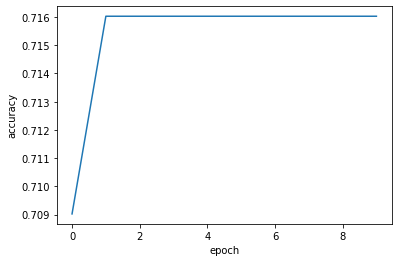

In [32]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

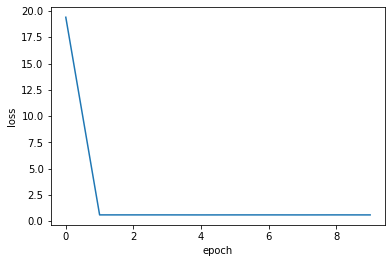

In [33]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [34]:
print('Evaluation\n')
print('   Loss:     ' + str(score[0]))
print('   Accuracy: ' + str(score[1]))

Evaluation

   Loss:     0.6221709847450256
   Accuracy: 0.6870466470718384


In [35]:
predictions_vgg16 = vgg16.predict(X_test)

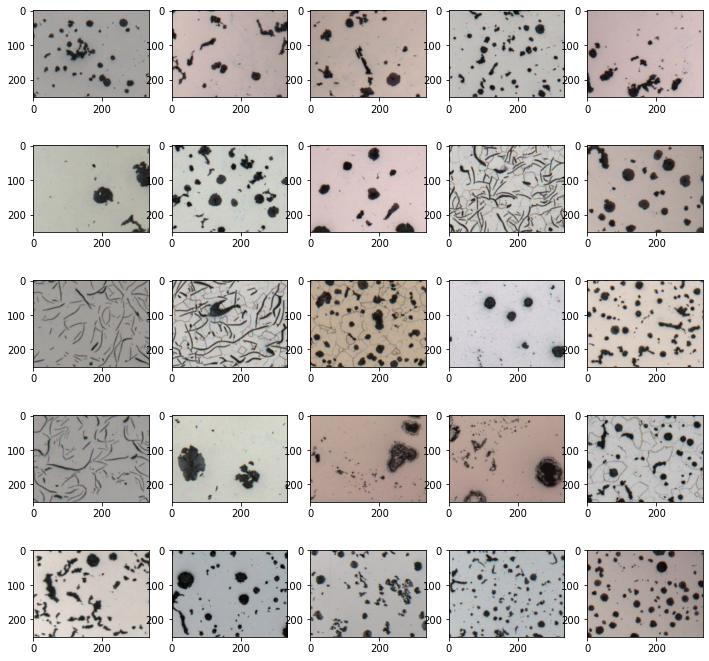

In [60]:
images_wrong_pred(predictions_vgg16)

## VGG19

In [37]:
vgg19 = VGG19CNN(X_train[0].shape, batch_size=10, nb_epochs=10)

In [38]:
vgg19.model_summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 251, 335, 3)       0         
_________________________________________________________________
vgg19 (Functional)           (None, 7, 10, 512)        20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 35840)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               9175296   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [39]:
history_vgg19 = vgg19.train_model(X_train, y_train)

Epoch 1/10
386/386 [==============================] - 45s 113ms/step - loss: 1.0005 - accuracy: 0.7071
Epoch 2/10
386/386 [==============================] - 43s 111ms/step - loss: 0.3842 - accuracy: 0.8518
Epoch 3/10
386/386 [==============================] - 43s 111ms/step - loss: 0.4601 - accuracy: 0.8104
Epoch 4/10
386/386 [==============================] - 43s 111ms/step - loss: 0.3477 - accuracy: 0.8670
Epoch 5/10
386/386 [==============================] - 43s 111ms/step - loss: 0.3192 - accuracy: 0.8766
Epoch 6/10
386/386 [==============================] - 43s 111ms/step - loss: 0.3456 - accuracy: 0.8649
Epoch 7/10
386/386 [==============================] - 43s 111ms/step - loss: 0.2418 - accuracy: 0.9116
Epoch 8/10
386/386 [==============================] - 43s 111ms/step - loss: 0.2725 - accuracy: 0.8854
Epoch 9/10
386/386 [==============================] - 43s 111ms/step - loss: 0.2583 - accuracy: 0.9048
Epoch 10/10
386/386 [==============================] - 43s 111ms/step - l

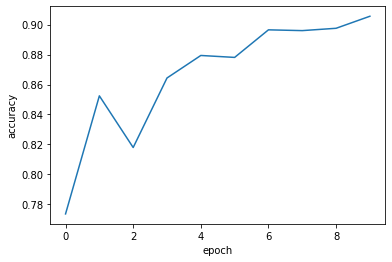

In [40]:
plt.plot(history_vgg19.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

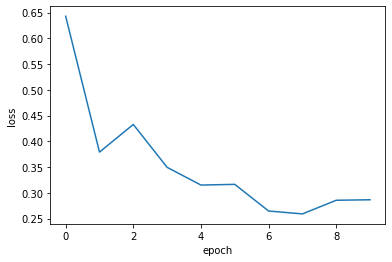

In [41]:
plt.plot(history_vgg19.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [42]:
score_vgg19 = vgg19.evaluate_model(X_test, y_test)

97/97 [==============================] - 11s 115ms/step - loss: 0.3489 - accuracy: 0.8798


In [43]:
print('Evaluation\n')
print('   Loss:     ' + str(score_vgg19[0]))
print('   Accuracy: ' + str(score_vgg19[1]))

Evaluation

   Loss:     0.3489377498626709
   Accuracy: 0.8797927498817444


In [44]:
predictions_vgg19 = vgg19.predict(X_test)

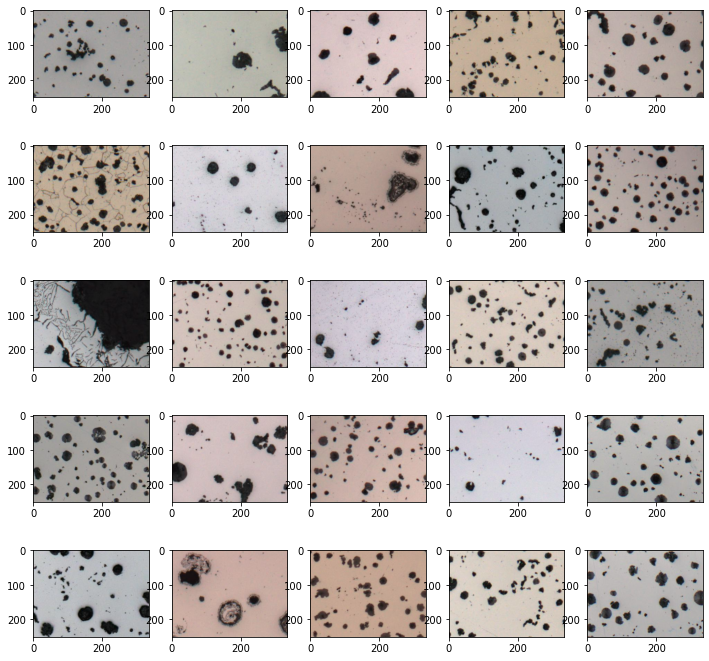

In [61]:
images_wrong_pred(predictions_vgg19)

## Finetuning VGG19

In [46]:
from keras.optimizers import Adam

vgg19.base_model.trainable = True
fine_tune_epochs=10
total_epochs =  10 + fine_tune_epochs
ft_learn_rate=0.0001
adam = Adam(learning_rate=ft_learn_rate)

vgg19.model.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])

history_vgg19_fine = vgg19.model.fit(X_train, y_train, batch_size=10,
                    epochs=total_epochs,
                    initial_epoch=history_vgg19.epoch[-1],
                    steps_per_epoch=len(X_train)/10,
                    verbose = 1)

Epoch 10/20
385/385 [==============================] - 126s 323ms/step - loss: 0.6782 - accuracy: 0.6874
Epoch 11/20
385/385 [==============================] - 123s 319ms/step - loss: 0.6023 - accuracy: 0.7186
Epoch 12/20
385/385 [==============================] - 123s 319ms/step - loss: 0.5989 - accuracy: 0.7219
Epoch 13/20
385/385 [==============================] - 123s 320ms/step - loss: 0.6041 - accuracy: 0.7146
Epoch 14/20
385/385 [==============================] - 123s 318ms/step - loss: 0.5986 - accuracy: 0.7197
Epoch 15/20
385/385 [==============================] - 122s 317ms/step - loss: 0.5913 - accuracy: 0.7247
Epoch 16/20
385/385 [==============================] - 123s 318ms/step - loss: 0.5891 - accuracy: 0.7312
Epoch 17/20
385/385 [==============================] - 122s 316ms/step - loss: 0.6022 - accuracy: 0.7163
Epoch 18/20
385/385 [==============================] - 122s 318ms/step - loss: 0.5612 - accuracy: 0.7424
Epoch 19/20
385/385 [==============================] - 

In [47]:
vgg19.model_summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 251, 335, 3)       0         
_________________________________________________________________
vgg19 (Functional)           (None, 7, 10, 512)        20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 35840)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               9175296   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

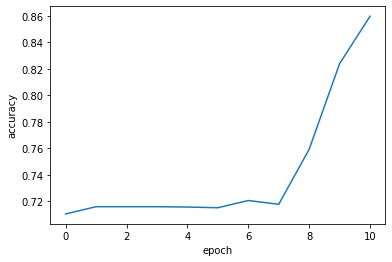

In [48]:
plt.plot(history_vgg19_fine.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

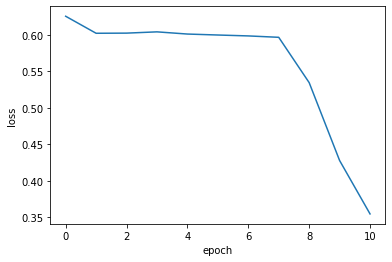

In [49]:
plt.plot(history_vgg19_fine.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [50]:
score_vgg19_fine = vgg19.evaluate_model(X_test, y_test)

97/97 [==============================] - 10s 104ms/step - loss: 0.3541 - accuracy: 0.8508


In [51]:
print('Evaluation\n')
print('   Loss:     ' + str(score_vgg19_fine[0]))
print('   Accuracy: ' + str(score_vgg19_fine[1]))

Evaluation

   Loss:     0.35408058762550354
   Accuracy: 0.8507772088050842


In [52]:
predictions_vgg19_fine = vgg19.predict(X_test)

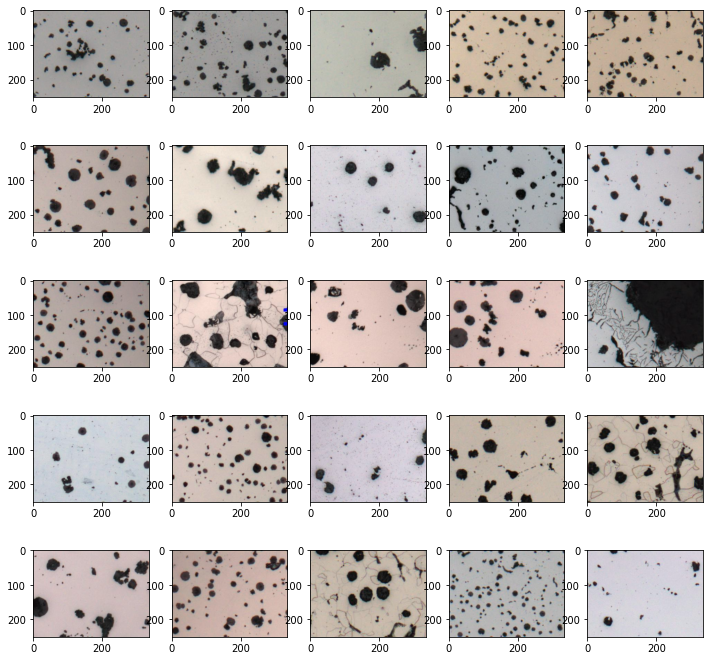

In [62]:
images_wrong_pred(predictions_vgg19_fine)

In [54]:
def get_index_of_image_array_elem(items, value):
    for i in range(len(items)):
        comparison = items[i] == value
        equal_arrays = comparison.all()
    if equal_arrays:
        return i
    return -1

In [55]:
def images_wrong_pred_filenames(predictions):
    columns = ['filename', 'actual', 'predicted']
    table_content = []

    round_preds = []
    for pred in predictions:
        pred = list(pred)[0]
        round_preds.append(round(pred))

    for i in range(len(X_test)):
        if round_preds[i] != y_test[i]:
            index = get_index_of_image_array_elem(X, X_test[i])
            if index != -1:
                filename = df['filename'][index].split('/')[-1]
                actual_class = df['category'][index]
                prediction_class = round_preds[i]
                table_content.append([filename, actual_class, prediction_class])
    return pd.DataFrame(table_content, columns=columns)

In [56]:
mistakes_df = images_wrong_pred_filenames(predictions_vgg19_fine)

In [57]:
mistakes_df

,filename,actual,predicted
0,12_2_0_500x.jpg,0,1
1,206_1_4_500x.jpg,1,0
2,59_3_2_500x.jpg,0,1
3,130_0_0_500x.jpg,1,0
4,130_4_1_500x.jpg,1,0
...,...,...,...
139,29_3_2_500x.jpg,0,1
140,32_0_1_500x.jpg,0,1
141,32_1_3_500x.jpg,0,1
142,18_1_2_500x.jpg,0,1
